In [26]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
import json

In [46]:
g = rdflib.Graph()
result1 = g.parse('project/sampled.ttl', format='turtle')
g = rdflib.Graph()
result2 = g.parse('project/sampled2.ttl', format='turtle')
g = rdflib.Graph()
result3 = g.parse('project/sampled3.ttl', format='turtle')

In [49]:
with open('training_data.json', 'r') as f:
  query1 = json.load(f)
  
with open('training_data1.json', 'r') as f:
  query2 = json.load(f)

In [50]:
queries = query1 + query2 # concat

In [51]:
len(queries)

512

In [52]:
queries[0]

{'question': "Who are the individuals who have held the title 'Minister for Magic'?",
 'SPQRQL': 'SELECT ?individual WHERE { ?individual hp:title hp:Minister_for_magic. }'}

In [69]:
# filtered no return queries
filtered_queries = []
for query in queries:
  try:
    qres1 = result1.query(query['SPQRQL'])
    qres2 = result2.query(query['SPQRQL'])
    qres3 = result3.query(query['SPQRQL'])
    
    if len(list(qres1)) > 0:
      filtered_queries.append({
        "question": query['question'],
        "SPARQL": query['SPQRQL'],
      })
    elif len(list(qres2)) > 0:
      filtered_queries.append({
        "question": query['question'],
        "SPARQL": query['SPQRQL'],
      })
    elif len(list(qres3)) > 0:
      filtered_queries.append({
        "question": query['question'],
        "SPARQL": query['SPQRQL'],
      })
    
    """for row in qres:
     print(f"{row}")"""
  except Exception as e:
    #print(query['SPQRQL'])
    print(e)
  #

Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found 'S'  (at char 0), (line:1, col:1)
Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found '&'  (at char 159), (line:1, col:160)
Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found 'W'  (at char 0), (line:1, col:1)
Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found 'h'  (at char 154), (line:1, col:155)
Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found 'W'  (at char 0), (line:1, col:1)


In [75]:
# filter duplicated queries
question_set = set()
final_queries = []
for query in filtered_queries:
    if query['question'] not in question_set:
        final_queries.append({
            "question": query['question'],
            "SPARQL": query['SPARQL'],
        })
        question_set.add(query['question'])

In [76]:
len(final_queries)

312

In [77]:
with open('train.json', 'w') as json_file:
    json.dump(final_queries, json_file)


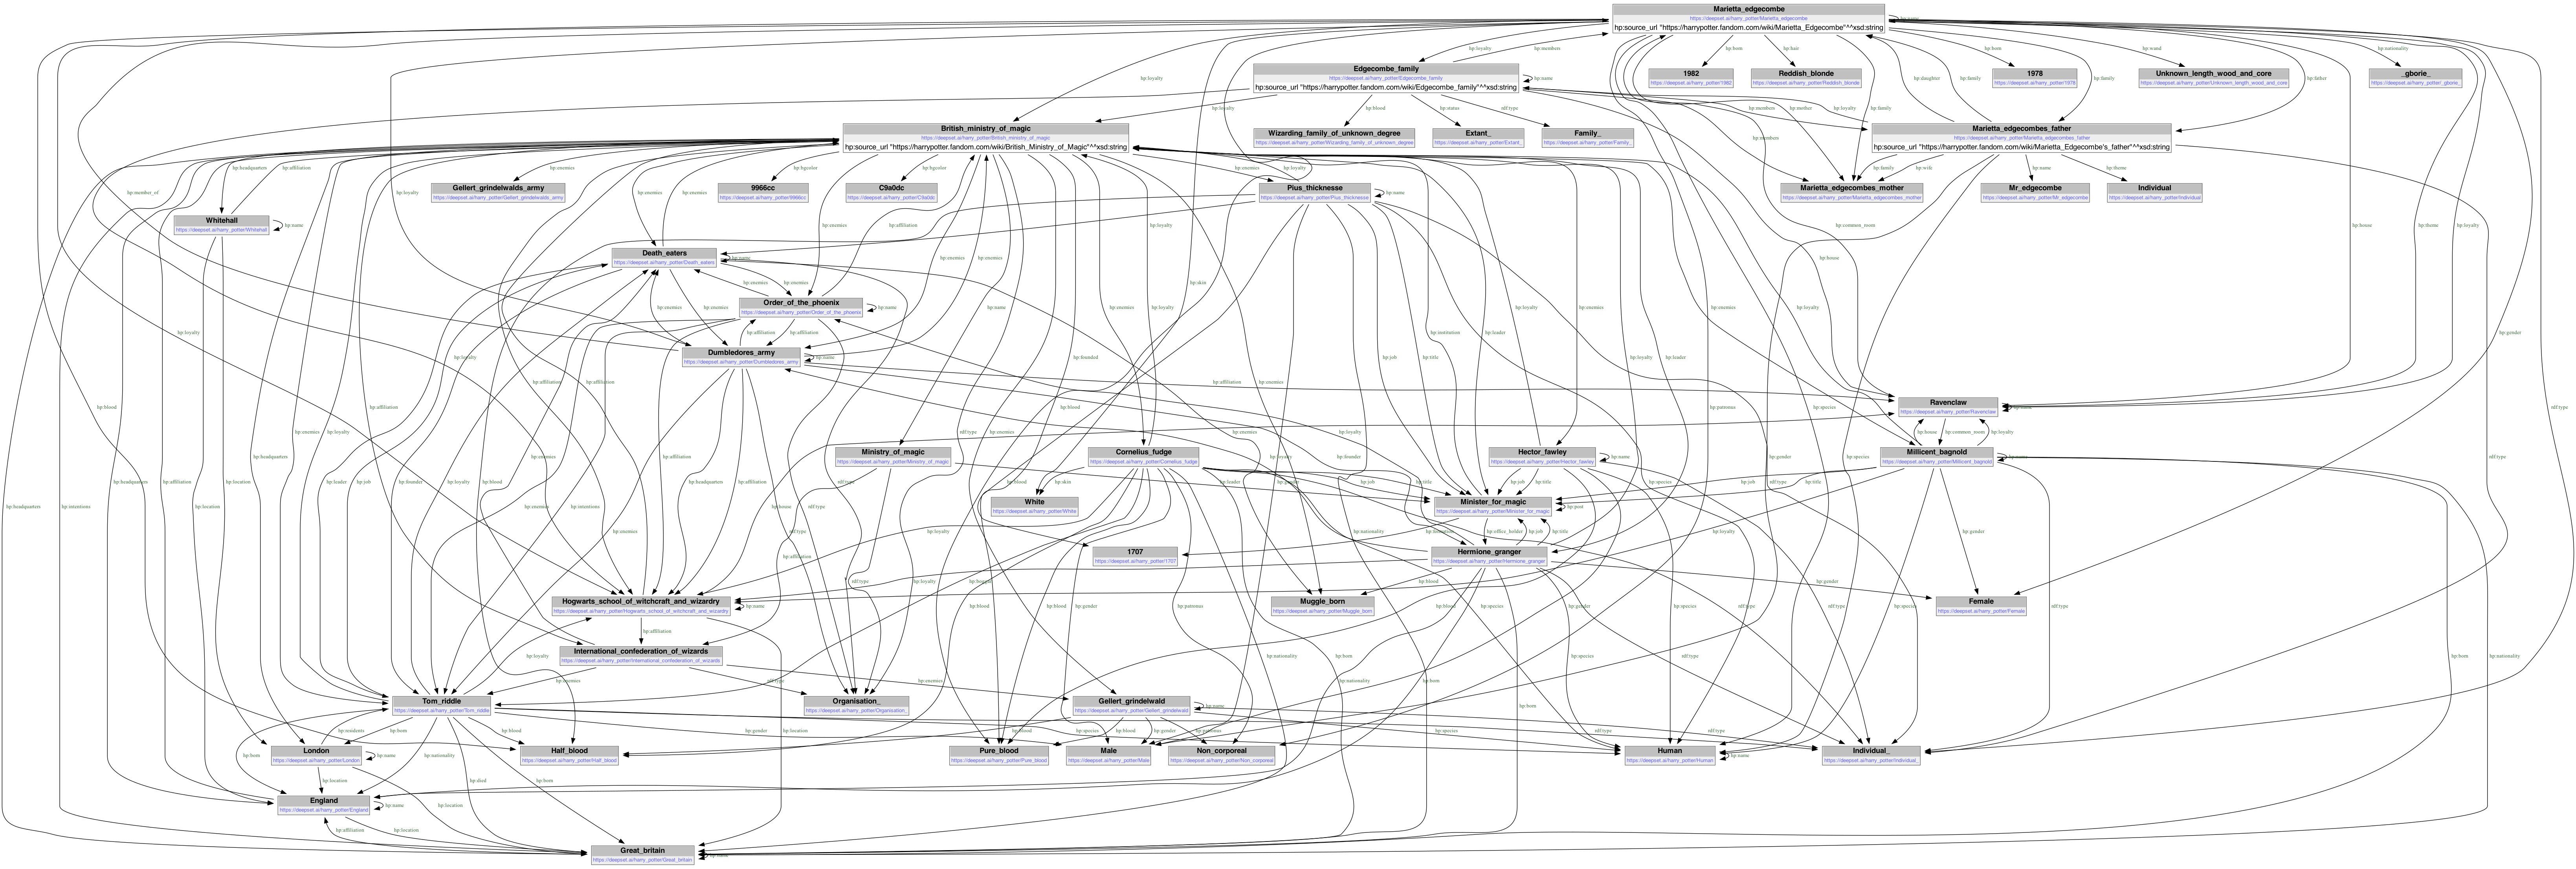

In [80]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    dg.write_png("kg.png")
    png = dg.create_png()
    display(Image(png))

visualize(result1)